In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nptdms
from nptdms import TdmsFile
savepath = 'U:/PIV_HSC_11_12_2019/Signal_200_Umin'
path = "U:/PIV_HSC_11_12_2019/Signal_200_Umin"

In [3]:
def writetdms(tdms, num):
    groups = tdms.groups()
    channels = tdms.group_channels(groups[0])
    channel_names = [channel.channel for channel in channels]
    obj = tdms.object(groups[0], channel_names[num])
    data = np.asarray(obj.data)
    

    return data



def datetime_to_float(timesignal):

    t0 = timesignal[0]
    t1 = timesignal[timesignal.shape[0] - 1]
    sec = (t1-t0).total_seconds()
    time = np.linspace(0, sec, timesignal.shape[0])

    return time

In [4]:
size = 128000
tpAr = np.empty(size)
pAr = np.empty(size)

In [5]:
ch = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)
tdms = TdmsFile(path+'/Messungen_' +str(9)+".tdms")
tp1 = datetime_to_float(writetdms(tdms, ch[0]))
p1 = writetdms(tdms, ch[1])
tp2 = datetime_to_float(writetdms(tdms, ch[2]))
p2 = writetdms(tdms, ch[3])
tp3 = datetime_to_float(writetdms(tdms, ch[4]))
p3 = writetdms(tdms, ch[5])
tp4 = datetime_to_float(writetdms(tdms, ch[6]))
p4 = writetdms(tdms, ch[7])
tpV = datetime_to_float(writetdms(tdms, ch[8]))
pV = writetdms(tdms, ch[9])
tpAr = datetime_to_float(writetdms(tdms, ch[10]))
pAr = writetdms(tdms, ch[11])
t_hub = datetime_to_float(writetdms(tdms, ch[12]))
hub = writetdms(tdms, ch[13])
tpd2 = datetime_to_float(writetdms(tdms, ch[14]))
pd2 = writetdms(tdms, ch[15])
tpd1 = datetime_to_float(writetdms(tdms, ch[16]))
pd1 = writetdms(tdms, ch[17])
tpd5 = datetime_to_float(writetdms(tdms, ch[18]))
pd5 = writetdms(tdms, ch[19])
tpd7 = datetime_to_float(writetdms(tdms, ch[20]))
pd7 = writetdms(tdms, ch[21])
tbsv = datetime_to_float(writetdms(tdms, ch[22]))
bsv = writetdms(tdms, ch[23])
tbsr = datetime_to_float(writetdms(tdms, ch[24]))
bsr = writetdms(tdms, ch[25])

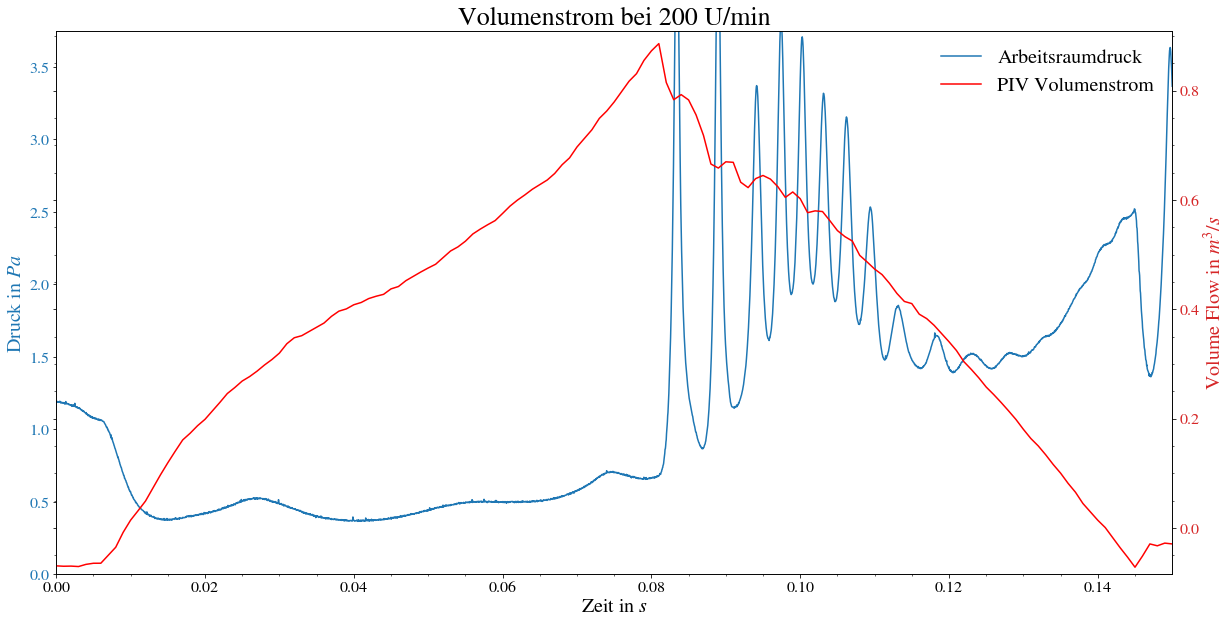

In [6]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

x =np.genfromtxt(path+'/Signal_200_Umin.csv',delimiter=';')

time = x[:,0]
flow = x[:, 1]

#new_time = np.linspace(0, (time[-1000]-time[89500]), time[89500:-1000].shape[0])
fig, ax1 = plt.subplots(figsize=(20, 10))
ax1.tick_params(axis='x', labelsize='16')
ax1.set_title('Volumenstrom bei 200 U/min', fontsize='26')
color = 'tab:blue'
ln1 = ax1.plot(tp1[613:]-tp1[613], p1[613:], label='Arbeitsraumdruck')
ax1.set_ylim(0.0, 3.75)
ax1.set_xlabel('Zeit in $s$', fontsize='20')
ax1.set_ylabel('Druck in $Pa$', color=color, fontsize='20')
ax1.tick_params(axis='y', labelcolor=color, labelsize='16')
#ax1.minorticks_on()
#ax1.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
# Customize the minor grid
# ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
#ax1.tick_params(which='both',  # Options for both major and minor ticks
#                top='off',  # turn off top ticks
#                left='off',  # turn off left ticks
#                right='off',  # turn off right ticks
#                bottom='off')  # turn off bottom ticks

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
#ax2.set_ylim(0e5, 23e5)
ln2 = ax2.plot(time, flow,color='red', label='PIV Volumenstrom')
ax2.set_xlim(0.0,0.15)
ax2.set_ylim(np.min(flow), np.max(flow))
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Volume Flow in $m^3/s$', color=color, fontsize='20')
ax2.minorticks_on()
#ax1.grid(which='minor', linestyle='--', linewidth='0.5', color='grey')
# Customize the minor grid
# ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
ax2.tick_params(which='both',  # Options for both major and minor ticks
                top='off',  # turn off top ticks
                left='off',  # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off',  # turn off bottom ticks
                labelsize='16',
                labelcolor=color)
#ax3 = ax2.twinx()
#color = 'tab:green'
#ln3 = ax3.plot(t_hub[613:,], hub[613:,], color='green', label='Hub')
#ax3.set_xlim(0.325,0.725)
#ax2.set_ylim(np.min(flow),0.3)
#ax3.set_xlabel('Zeit (s)')
#ax3.set_ylabel('Hub in $mm$', color=color, fontsize='20')
#ax3.minorticks_on()
#ax1.grid(which='minor', linestyle='--', linewidth='0.5', color='grey')
# Customize the minor grid
# ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
#ax3.tick_params(which='both',  # Options for both major and minor ticks
#                top='off',  # turn off top ticks
#                left='off',  # turn off left ticks
#                right='off',  # turn off right ticks
#                bottom='off',  # turn off bottom ticks
#                labelsize='16',
#                labelcolor=color)
#ax3.spines["right"].set_position(("axes", 1.05))

lns = ln1 + ln2# + ln3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right', frameon=False, fontsize='20')
#plt.grid()

#plt.savefig('L:/022_PIV_OVP/Messung_200Umin_p1.png', dpi=800)
plt.show()


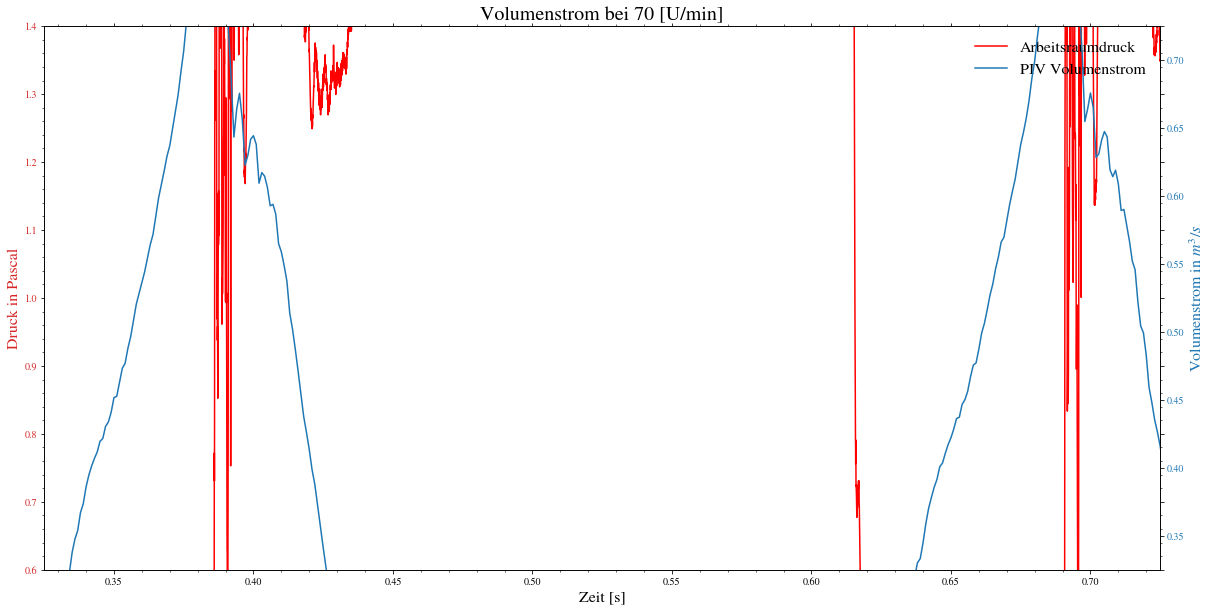

In [7]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
ax1.set_title('Volumenstrom bei 70 [U/min]', fontsize='20')
color = 'tab:red'
ax1.set_xlabel('Zeit [s]', fontsize='16')
ax1.set_ylabel('Druck in Pascal', color=color, fontsize='16')
ln1 = ax1.plot(tpAr[613:]-tpAr[613], pAr[613:], label='Arbeitsraumdruck', color='red')
ax1.set_ylim(0.6, 1.4)
ax1.set_xlim(0.325,0.725)
ax1.tick_params(axis='y', labelcolor=color)
ax1.minorticks_on()
#ax1.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
# Customize the minor grid
# ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
ax1.tick_params(which='both',  # Options for both major and minor ticks
                top='off',  # turn off top ticks
                left='off',  # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off')  # turn off bottom ticks

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Volumenstrom in $m^3/s$', color=color, fontsize='16')  # we already handled the x-label with ax1
ax2.set_ylim(0.325,0.725)
ln2 = ax2.plot(time, flow, color=color, label='PIV Volumenstrom')
ax2.tick_params(axis='y', labelcolor=color)
ax1.minorticks_on()
#ax1.grid(which='major', linestyle='--', linewidth='0.5', color='grey')
# Customize the minor grid
# ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
ax1.tick_params(which='both',  # Options for both major and minor ticks
                top='off',  # turn off top ticks
                left='off',  # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off')  # turn off bottom ticks
#fig.tight_layout()
#plt.grid(which='major')
lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right', frameon=False, fontsize='16')
#plt.savefig(), dpi=800)
plt.show()
plt.close(fig)